In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


---
# VIDEO: Concept and uses of the inverse
---


[[ 1.00000000e+00 -1.30285150e-16 -3.00725244e-16]
 [-4.53176583e-17  1.00000000e+00 -7.27333327e-16]
 [ 1.94144875e-18  1.11066749e-16  1.00000000e+00]]


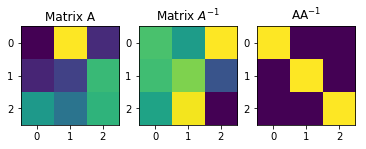

In [5]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
id = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(id)


# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(id)
plt.title('AA$^{-1}$')

plt.show()


---
# VIDEO: Computing the inverse via row reduction
---


Size of Aaug: (4, 8)


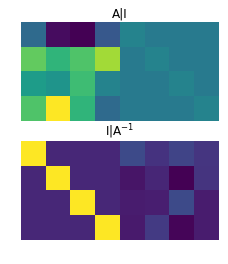

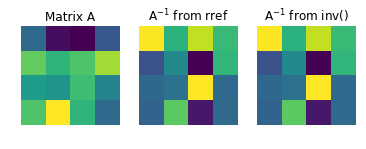

In [172]:
## notice the difference in implementation in this video using sympy, compared to the previous video using numpy ##

# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'))
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()


# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()


---
# VIDEO: Left inverse and right inverse
---


Rank of A^TA: 3
Rank of AA^T: 3


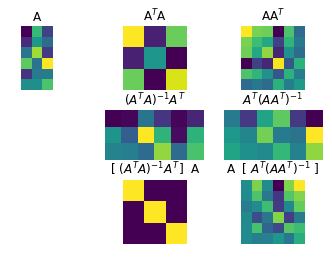

In [3]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# create matrices
A = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# inspect ranks
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) ) 
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@np.matrix.transpose(A)

# right inverse
Aright = np.matrix.transpose(A)@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt


## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()

In [15]:
A = np.random.randn(4,4)
B = np.random.randn(4,4)
np.corrcoef(A,B)
np.corrcoef(A.)

array([[ 1.        , -0.10484702, -0.82910538,  0.25663835, -0.01318118,
         0.72652958,  0.8313466 ,  0.53305497],
       [-0.10484702,  1.        , -0.38703241,  0.85783457, -0.56767182,
         0.53802586, -0.56529035, -0.7033945 ],
       [-0.82910538, -0.38703241,  1.        , -0.52636408,  0.04393741,
        -0.8086684 , -0.54163255,  0.02628395],
       [ 0.25663835,  0.85783457, -0.52636408,  1.        , -0.82217072,
         0.84967049, -0.31966308, -0.23836037],
       [-0.01318118, -0.56767182,  0.04393741, -0.82217072,  1.        ,
        -0.60995686,  0.49274446, -0.07751682],
       [ 0.72652958,  0.53802586, -0.8086684 ,  0.84967049, -0.60995686,
         1.        ,  0.2231014 ,  0.14789998],
       [ 0.8313466 , -0.56529035, -0.54163255, -0.31966308,  0.49274446,
         0.2231014 ,  1.        ,  0.60555859],
       [ 0.53305497, -0.7033945 ,  0.02628395, -0.23836037, -0.07751682,
         0.14789998,  0.60555859,  1.        ]])


---
# VIDEO: The pseudoinverse, part 1
---


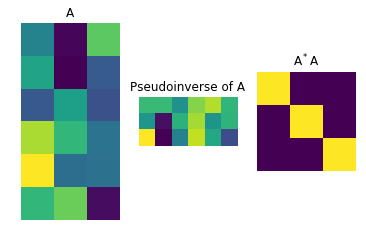

In [200]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

rank = 49


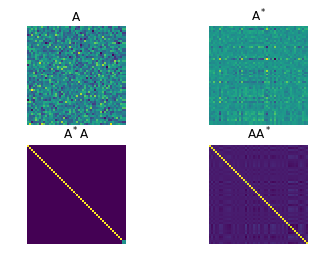

In [215]:

# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))


# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()